In [1]:
set.seed(2000)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
url <- "https://raw.githubusercontent.com/eknoll02/dsci-100-003-group-3/main/abalone.csv"

c <- c("sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings")

abalone<- read_csv(url, col_names = c) 
abalone

Rows: 4177 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sex
dbl (8): length, diameter, height, whole_weight, shucked_weight, viscera_wei...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex length diameter height whole_weight shucked_weight viscera_weight
1    M   0.455  0.365    0.095  0.5140       0.2245         0.1010        
2    M   0.350  0.265    0.090  0.2255       0.0995         0.0485        
3    F   0.530  0.420    0.135  0.6770       0.2565         0.1415        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
4175 M   0.600  0.475    0.205  1.1760       0.5255         0.2875        
4176 F   0.625  0.485    0.150  1.0945       0.5310         0.2610        
4177 M   0.710  0.555    0.195  1.9485       0.9455         0.3765        
     shell_weight rings
1    0.15         15   
2    0.07          7   
3    0.21          9   
⋮    ⋮            ⋮    
4175 0.308         9   
4176 0.296        10   
4177 0.495        12

In [3]:
abalone <- abalone |>
mutate(sex = as_factor(sex))

abalone

sex length diameter height whole_weight shucked_weight viscera_weight
1    M   0.455  0.365    0.095  0.5140       0.2245         0.1010        
2    M   0.350  0.265    0.090  0.2255       0.0995         0.0485        
3    F   0.530  0.420    0.135  0.6770       0.2565         0.1415        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
4175 M   0.600  0.475    0.205  1.1760       0.5255         0.2875        
4176 F   0.625  0.485    0.150  1.0945       0.5310         0.2610        
4177 M   0.710  0.555    0.195  1.9485       0.9455         0.3765        
     shell_weight rings
1    0.15         15   
2    0.07          7   
3    0.21          9   
⋮    ⋮            ⋮    
4175 0.308         9   
4176 0.296        10   
4177 0.495        12

In [4]:
abalone_split <- initial_split(abalone, prop = 0.75, strata = sex)
abalone_testing <- testing(abalone_split)
abalone_training <- training(abalone_split)

abalone_testing
abalone_training

sex length diameter height whole_weight shucked_weight viscera_weight
1    M   0.455  0.365    0.095  0.5140       0.2245         0.1010        
2    F   0.545  0.425    0.125  0.7680       0.2940         0.1495        
3    F   0.550  0.440    0.150  0.8945       0.3145         0.1510        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
1043 M   0.500  0.38     0.125  0.577        0.269          0.1265        
1044 F   0.565  0.45     0.165  0.887        0.370          0.2390        
1045 M   0.590  0.44     0.135  0.966        0.439          0.2145        
     shell_weight rings
1    0.15         15   
2    0.26         16   
3    0.32         19   
⋮    ⋮            ⋮    
1043 0.1535        9   
1044 0.2490       11   
1045 0.2605       10

sex length diameter height whole_weight shucked_weight viscera_weight
1    F   0.53   0.420    0.135  0.6770       0.2565         0.1415        
2    F   0.53   0.415    0.150  0.7775       0.2370         0.1415        
3    F   0.44   0.340    0.100  0.4510       0.1880         0.0870        
⋮    ⋮   ⋮      ⋮        ⋮      ⋮            ⋮              ⋮             
3130 M   0.56   0.430    0.155  0.8675       0.4000         0.1720        
3131 M   0.60   0.475    0.205  1.1760       0.5255         0.2875        
3132 M   0.71   0.555    0.195  1.9485       0.9455         0.3765        
     shell_weight rings
1    0.21          9   
2    0.33         20   
3    0.13         10   
⋮    ⋮            ⋮    
3130 0.229         8   
3131 0.308         9   
3132 0.495        12

In [5]:
abalone_sex <- abalone_training |>
group_by(shucked_weight) |>
summarize(n = n())

abalone_mean <- abalone_training |>
select(- shucked_weight) |>
map_dfr(mean)

abalone_mean
     

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


sex length   diameter  height    whole_weight viscera_weight shell_weight
1 NA  0.523758 0.4077411 0.1394381 0.828842     0.180561       0.2391186   
  rings   
1 9.935185

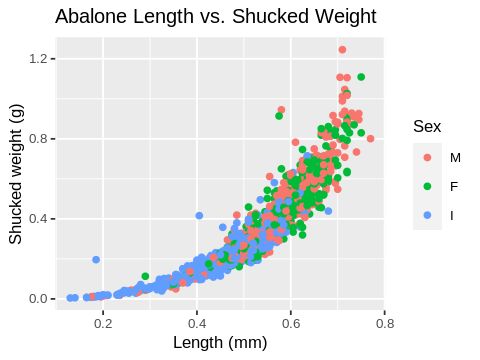

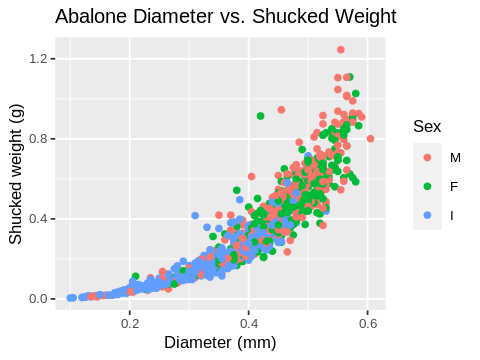

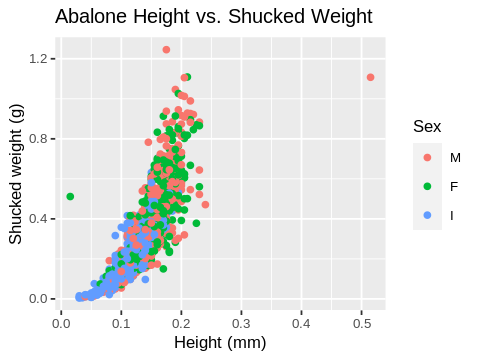

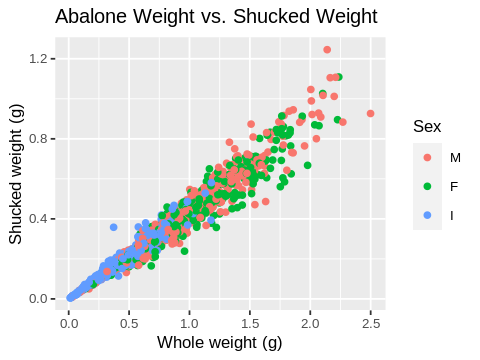

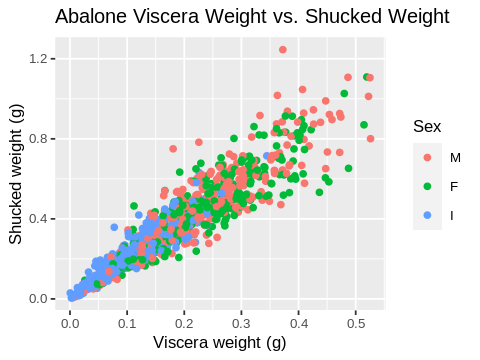

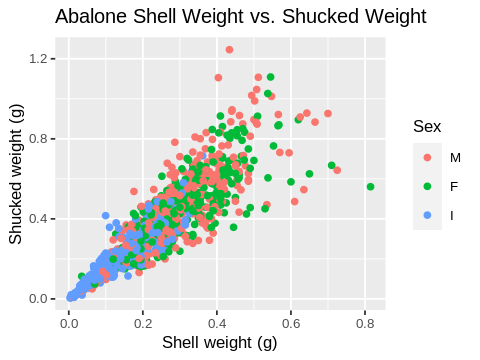

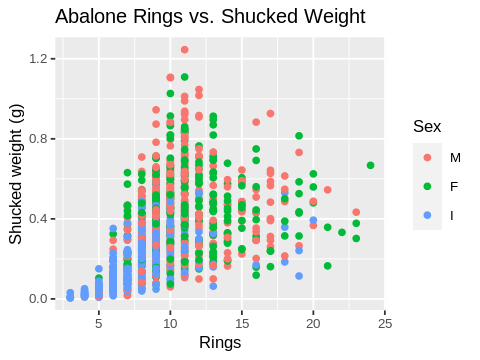

In [6]:
options(repr.plot.width = 4, repr.plot.height = 3)

abalone_length_plot <- abalone_testing |>
ggplot(aes(x = length, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Length (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Length vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_diameter_plot <- abalone_testing |>
ggplot(aes(x = diameter, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Diameter (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Diameter vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_height_plot <- abalone_testing |>
ggplot(aes(x = height, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Height (mm)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Height vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_weight_plot <- abalone_testing |>
ggplot(aes(x = whole_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Whole weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Weight vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_viscera_weight_plot <- abalone_testing |>
ggplot(aes(x = viscera_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Viscera weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Viscera Weight vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_shell_weight_plot <- abalone_testing |>
ggplot(aes(x = shell_weight, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Shell weight (g)", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Shell Weight vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_rings_plot <- abalone_testing |>
ggplot(aes(x = rings, y = shucked_weight)) +
geom_point(aes(colour = sex)) +
labs(x = "Rings", y = "Shucked weight (g)", colour = "Sex") +
ggtitle("Abalone Rings vs. Shucked Weight") +
theme(text = element_text(size = 10))

abalone_length_plot
abalone_diameter_plot
abalone_height_plot
abalone_weight_plot
abalone_viscera_weight_plot
abalone_shell_weight_plot
abalone_rings_plot

In [ ]:
abalone_recipe <- recipe(sex ~ length + diameter, data = abalone_training) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())
abalone_recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")
knn_spec

abalone_vfold <- vfold_cv(abalone, v = 5, strata = shucked_weight)

gridvals <- tibble(neighbors = c(1:100))

abalone_fit <- workflow() |>
                add_recipe(abalone_recipe) |>
                add_model(knn_spec) |>
                tune_grid(resamples = abalone_vfold, grid = gridvals) |>
            collect_metrics()

# Pulling accuracy estimates from workflow
accuracies <- abalone_fit |>
            filter(metric == "accuracy")
accuracies

# Plotting accuracy against K value
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
                    geom_point() +
                    geom_line() +
                    labs(x = "Neighbors", Y = "Accuracy Estimate") + ggtitle("Accuracy Estimate vs. Values of K") +
                    theme(text = element_text(size = 15))
accuracy_versus_k




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 
